<a href="https://colab.research.google.com/github/AkankshaB123/fraud_detection_mitigation/blob/main/Data_Pre_Processing_and_Modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Next Steps**

1. Classification Models
*   Logistic Regression
*   XG Boost
*   SVM's
*   Decision Trees

2. Class Imbalance Solutions
*   Under Sampling
*   Over Sampling
*   SMOTE

3. Metrics
*   Accuracy Score
*   Confusion Matrix
*   ROC_AUC
*   F1 Score














In [ ]:
#1. Class Imbalance Solutions for Classification Problems
#2. Principal Component Analysis
#3. AUC ROC curve for model performance
#4. Modelling process, go through the code

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Pandas Version: 2.2.2
Numpy Version: 2.0.2
Matplotlib Version: 3.10.0
Seaborn Version: 0.13.2
Path to dataset files: /kaggle/input/creditcardfraud
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170 

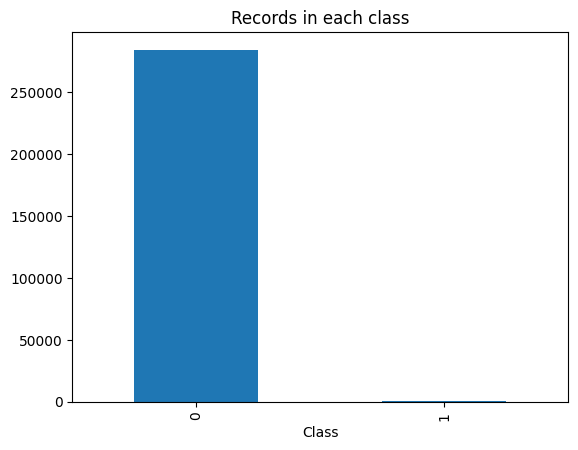

Fraud transactions are as follows 0.17 %
Normal transactions are as follows 99.83 %


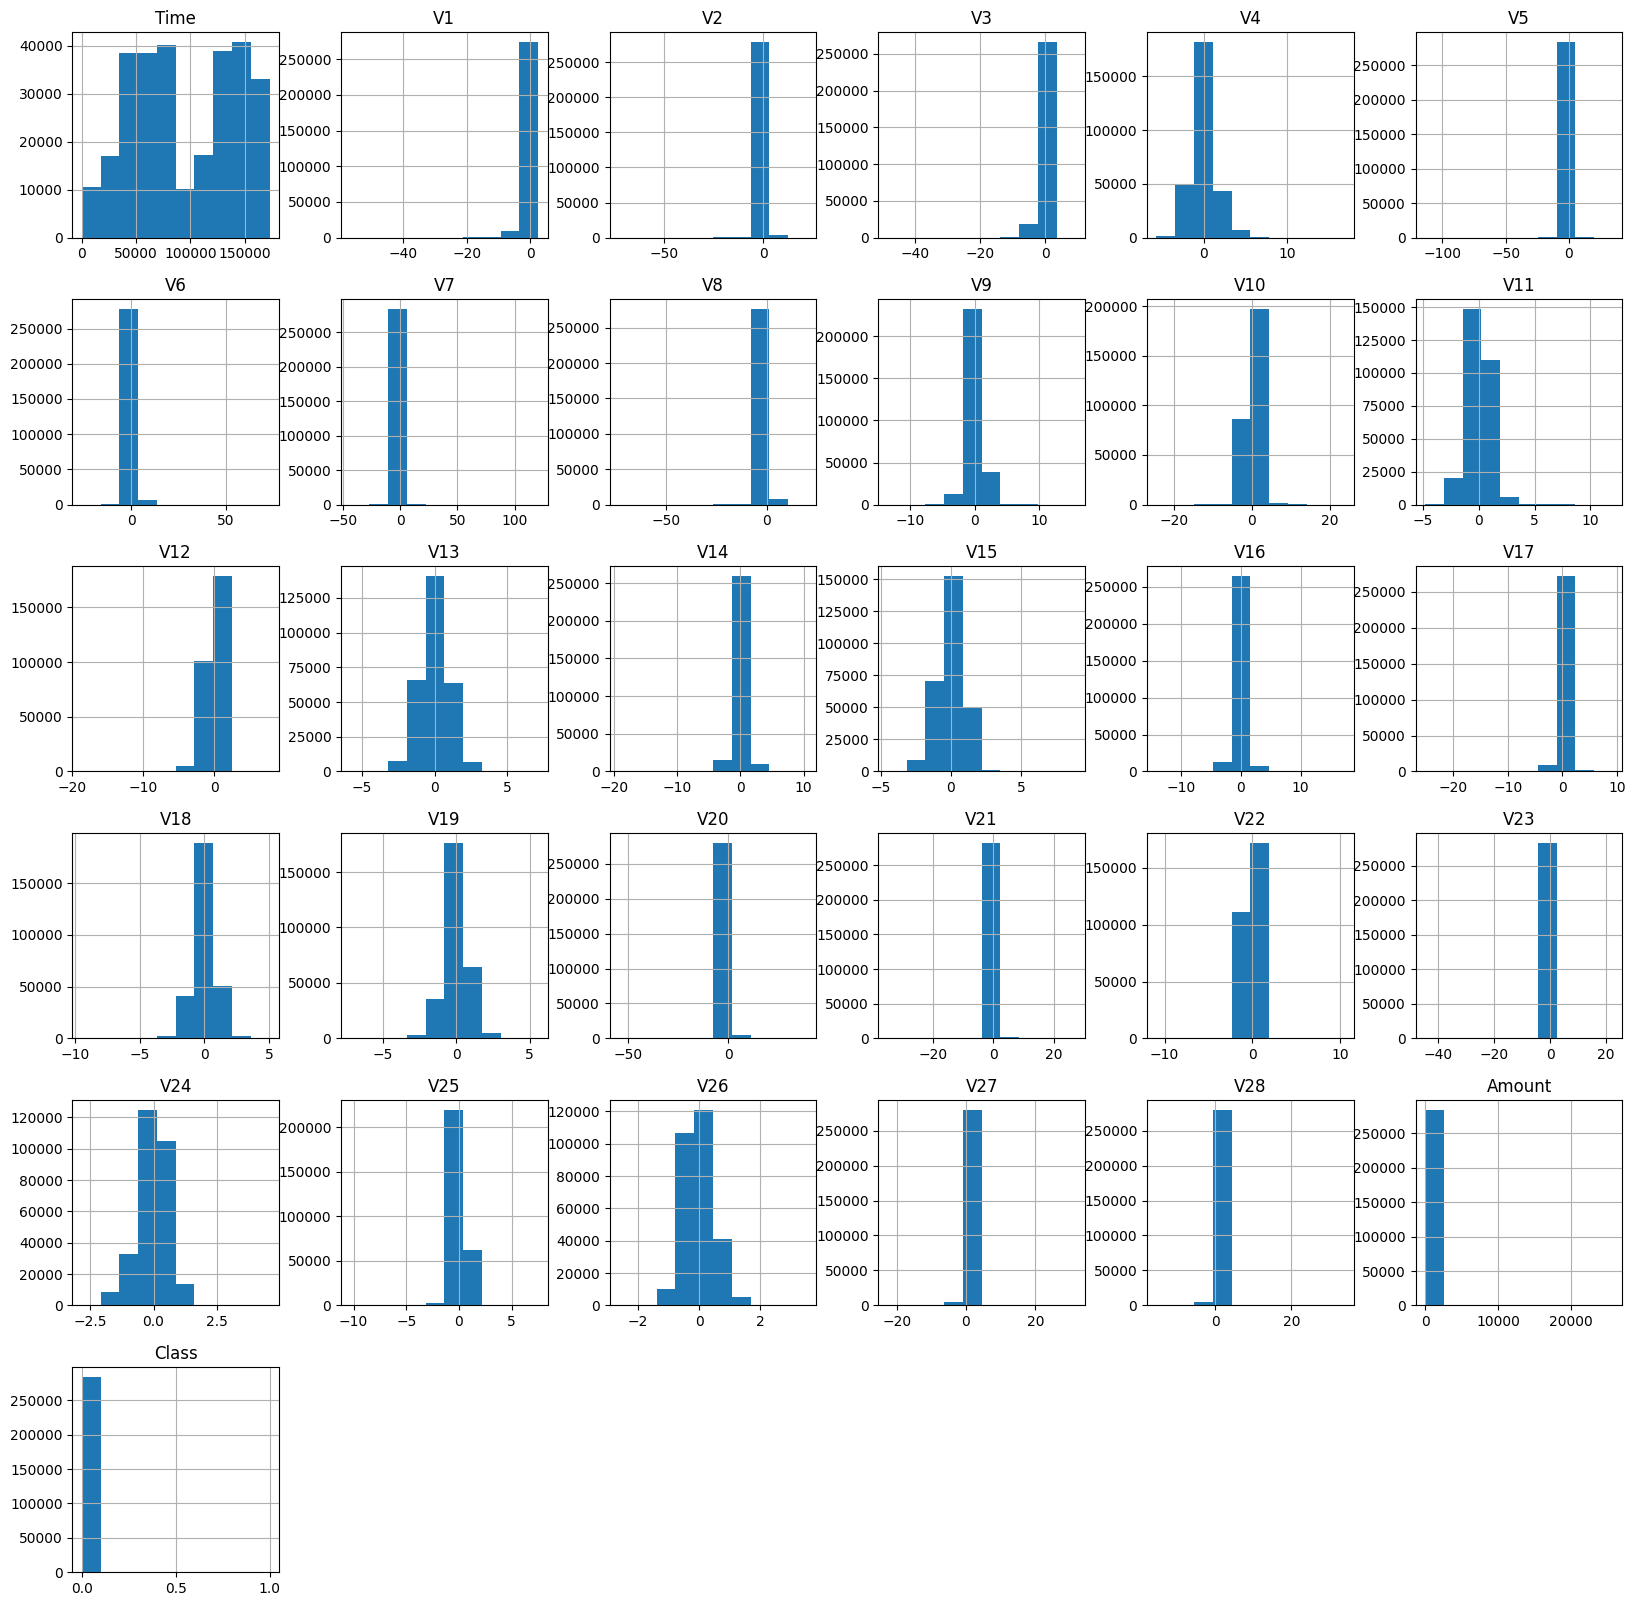

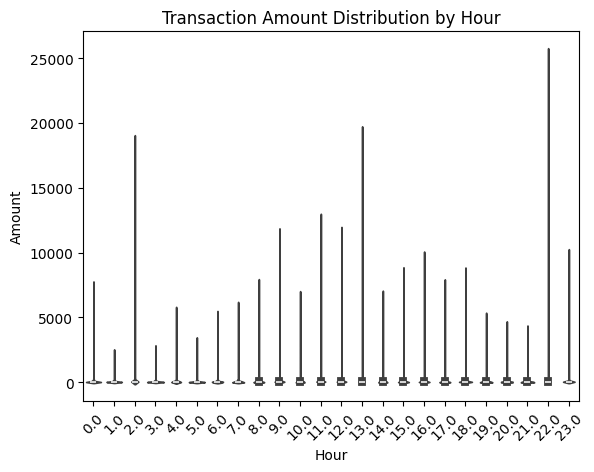

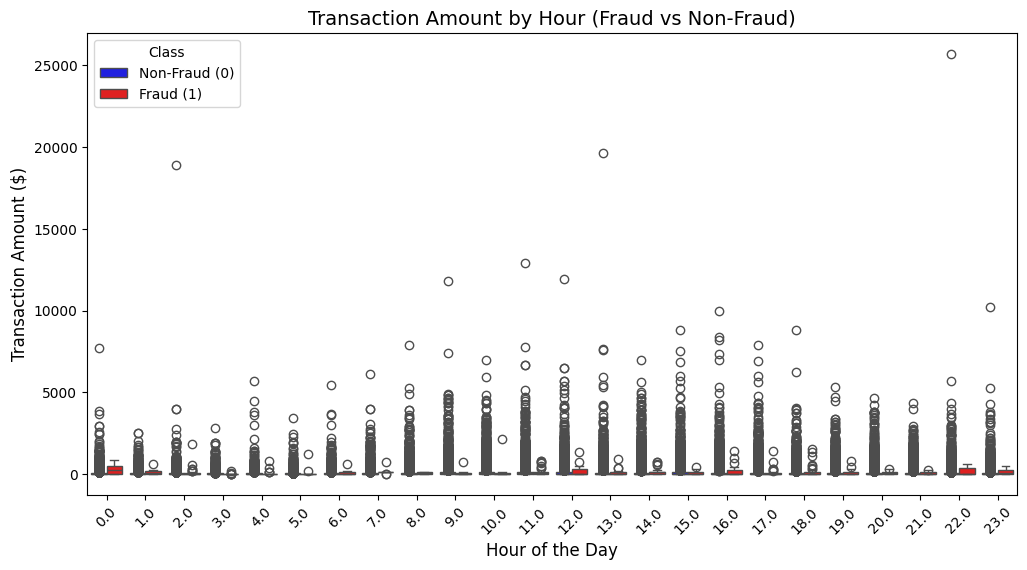

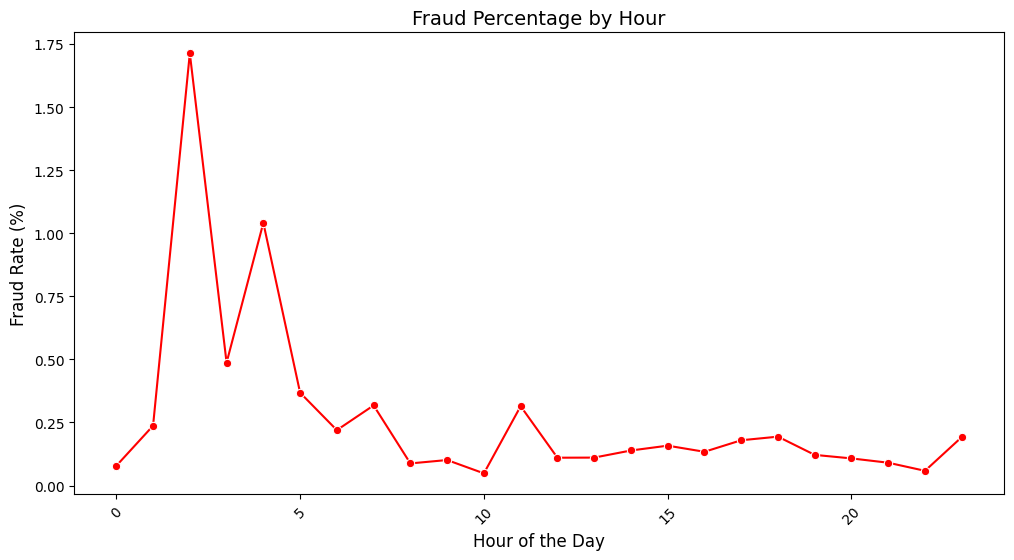

Fraud + outlier % cases are: 0.29 %
Non-Fraud + outlier % cases are: 99.71 %


KeyError: "None of [Index(['outliers'], dtype='object')] are in the [columns]"

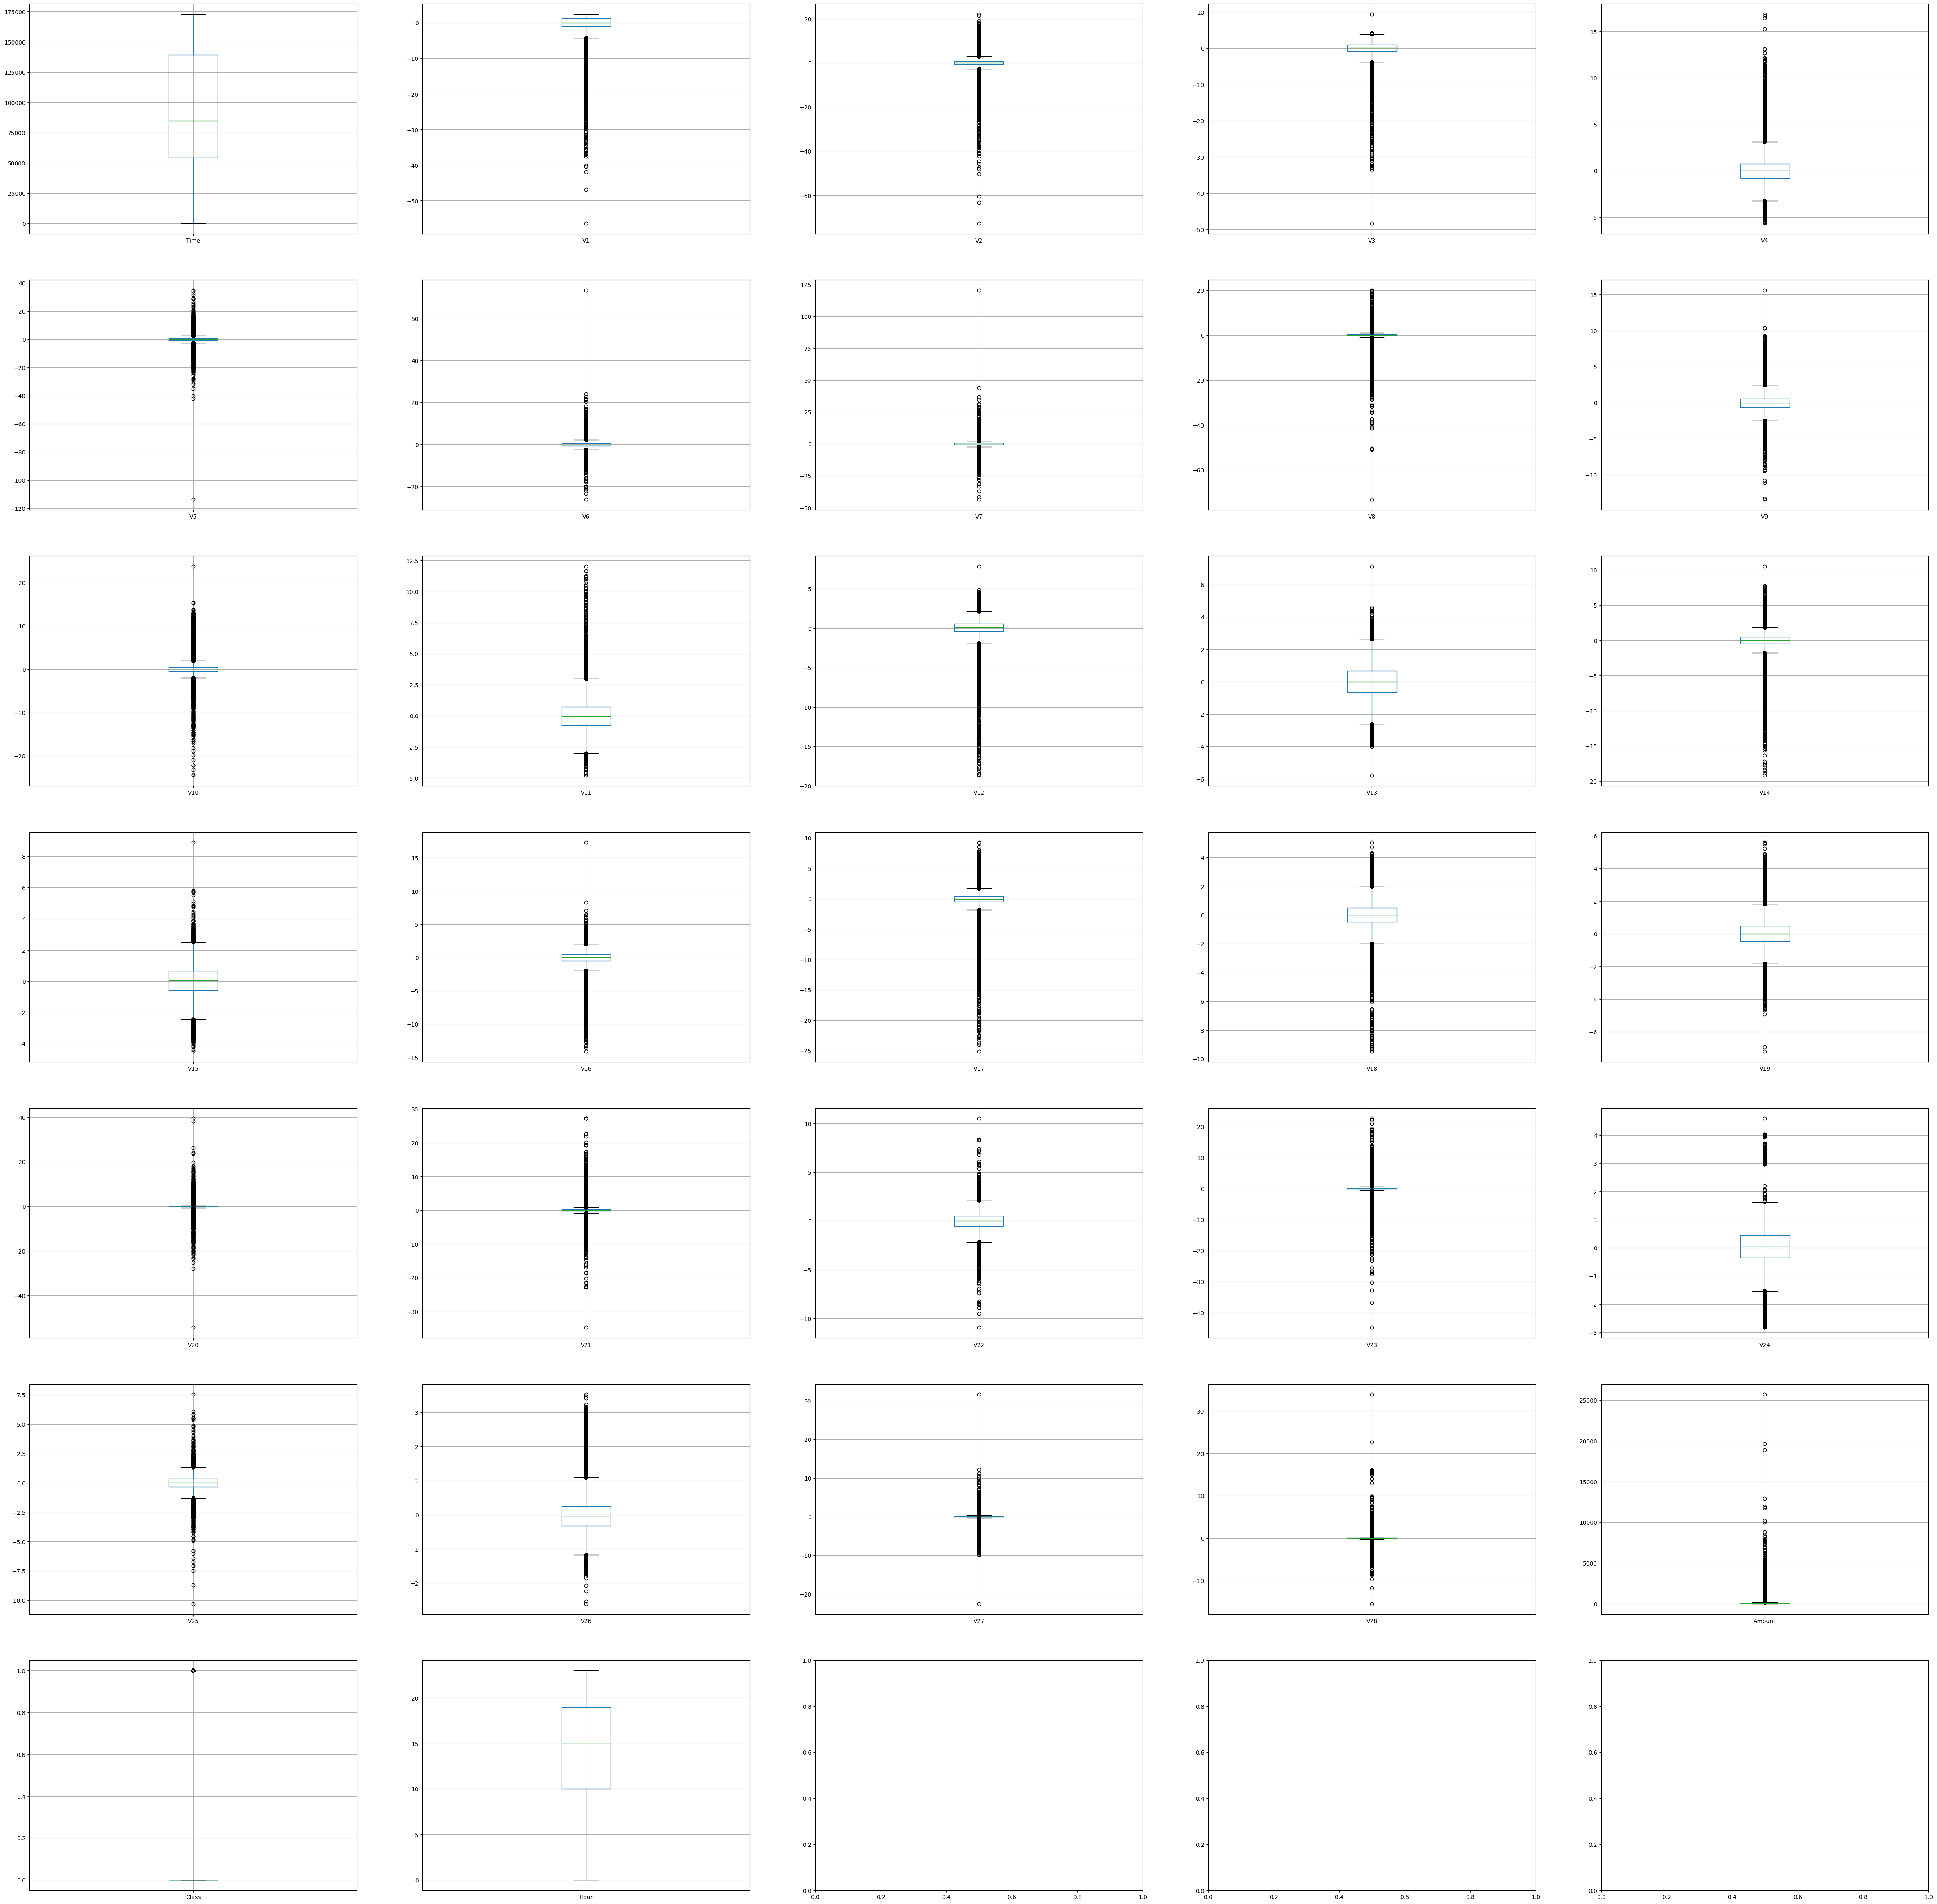

KeyError: "None of [Index(['outliers'], dtype='object')] are in the [columns]"

In [18]:
from google.colab import drive
drive.mount('/content/drive')

# Then run the notebook
# Correct the path to the notebook if necessary.
# Verify the file 'EDA.ipynb' exists in the specified location.
%run /content/drive/MyDrive/Colab\ Notebooks/EDA.ipynb

### **Under Sampling and Over Sampling**

In [ ]:
df.head()

# **Random Undersampling**
1/Ensure randomness through random_state

In [ ]:
# Shuffle original dataset
df = df.sample(frac=1, random_state=42)

# Separate majority and minority classes
fraud_df = df[df['Class'] == 1]       # Minority class (fraud)
non_fraud_df = df[df['Class'] == 0]   # Majority class (non-fraud)

# Randomly undersample the majority class to match the minority class count
non_fraud_undersampled_df = non_fraud_df.sample(n=len(fraud_df), random_state=42)

# Combine both classes (fraud and undersampled non-fraud)
undersampled_df = pd.concat([fraud_df, non_fraud_undersampled_df])

# Shuffle the new balanced DataFrame
undersampled_df = undersampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(undersampled_df['Class'].value_counts())

# Preview
undersampled_df.head()

# **Over Sampling**
1.   Option1: Manual Oversampling using Pandas
2.   Option2: Using RandomOverSampler from imblearn (preferred for modelling)

In [ ]:
#Option1: Manual Oversampling using Pandas
import pandas as pd

# Shuffle original dataset
df = df.sample(frac=1, random_state=42)

# Separate majority and minority classes
fraud_df = df[df['Class'] == 1]       # Minority class
non_fraud_df = df[df['Class'] == 0]   # Majority class

# Oversample fraud (minority) class to match majority count
fraud_oversampled_df = fraud_df.sample(n=len(non_fraud_df), replace=True, random_state=42)

# Combine oversampled minority with majority class
oversampled_df = pd.concat([fraud_oversampled_df, non_fraud_df])

# Shuffle the new balanced DataFrame
oversampled_df = oversampled_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check class distribution
print(oversampled_df['Class'].value_counts())

# Preview
oversampled_df.head()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
#Option2: Using RandomOverSampler from imblearn (preferred for modelling)
# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Apply RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_oversampled, y_oversampled = ros.fit_resample(X, y)

# Combine back into a DataFrame
model_ready_df = pd.concat([pd.DataFrame(X_oversampled, columns=X.columns),
                            pd.Series(y_oversampled, name='Class')], axis=1)

# Check class distribution
print(model_ready_df['Class'].value_counts())

# Preview
model_ready_df.head()

# **SMOTE**

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate features and labels
X = df.drop('Class', axis=1)
y = df['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Combine back into a DataFrame
smote_balanced_df = pd.concat([pd.DataFrame(X_smote, columns=X.columns),
                               pd.Series(y_smote, name='Class')], axis=1)

# Check new class distribution
print(smote_balanced_df['Class'].value_counts())

# Preview the result
smote_balanced_df.head()


**Data Frame Summary:**

1.   Random Under Sampling - undersampled_df
2.   Manual Oversampling	- oversampled_df
3.   RandomOverSampler - model_ready_df
4.   SMOTE - smote_balanced_df

